In [1]:
%matplotlib inline
import networkx as nx
from networkx.generators.classic import complete_graph
import itertools
import numpy as np

In [2]:
g = nx.karate_club_graph()

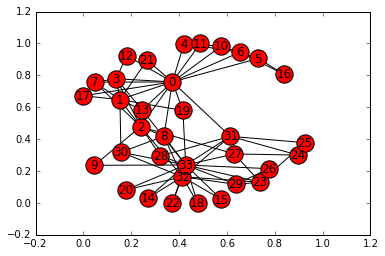

In [3]:
nx.draw_networkx(g, pos = nx.spring_layout(g))

In [4]:
import operator
# max(nx.betweenness_centrality(g), key=operator.itemgetter(1))
# max(nx.betweenness_centrality(g))
# max(nx.degree_centrality(g))
betwennes = nx.betweenness_centrality(g)
degree = nx.degree_centrality(g)
max(betwennes, key=betwennes.get), max(degree, key=degree.get)

(0, 33)

In [5]:
from collections import defaultdict
def find_maxx(d):
    b = defaultdict(set)
    for key, val in d.items():
        b[val].add(key)
    maxx = max(b)
    return b[maxx]

In [10]:
n = 6
g = complete_graph(n)
res = None
all_edges = []
m = len(nx.edges(g))
for i in range(m):
    all_edges += itertools.combinations(g.edges(), i)
print(len(all_edges))
for to_remove in all_edges:
    g = complete_graph(n)
    g.remove_edges_from(to_remove)
    betwennes = find_maxx(nx.betweenness_centrality(g))
    degree = find_maxx(nx.degree_centrality(g))
    if len(betwennes) == 1 and len(degree) == 1:
        if len(betwennes.intersection(degree)) == 0:
            print("Success")
            res = g
            break

32767
Success


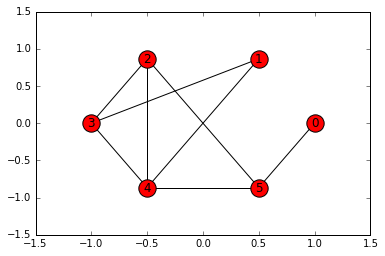

In [11]:
nx.draw_networkx(res, pos = nx.circular_layout(res))

In [12]:
print(res)

complete_graph(6)


In [13]:
betwennes = nx.betweenness_centrality(res)
degree = nx.degree_centrality(res)
print(nx.betweenness_centrality(res))
print(nx.degree_centrality(res))
max(betwennes, key=betwennes.get), max(degree, key=degree.get)

{0: 0.0, 1: 0.0, 2: 0.1, 3: 0.05, 4: 0.35000000000000003, 5: 0.4}
{0: 0.2, 1: 0.4, 2: 0.6000000000000001, 3: 0.6000000000000001, 4: 0.8, 5: 0.6000000000000001}


(5, 4)

In [ ]:
nx.random_graphs.gnm_random_graph()

In [60]:
n = 12
g = complete_graph(n)
res = None
all_edges = []
m = len(nx.edges(g))
maxx = n*(n-1)/2
count = 0
while True:
    try:
        count += 1
        if count % 100 == 0:
            print(count)
        g = nx.random_graphs.gnm_random_graph(n, 13)
        betwennes = find_maxx(nx.betweenness_centrality(g))
        degree = find_maxx(nx.degree_centrality(g))
        harmonic = find_maxx(nx.harmonic_centrality(g))
        eigen = find_maxx(nx.eigenvector_centrality_numpy(g))
        if len(betwennes) == 1 and len(degree) == 1 and len(harmonic) == 1 and len(eigen) == 1:
    #         if len(betwennes) == 1 and len(degree) == 1 and len(eigen) == 1:
            betwennes = betwennes.pop()
            degree = degree.pop()
            harmonic = harmonic.pop()
            eigen = eigen.pop()
            if len({betwennes, degree, harmonic, eigen}) == 4:
    #             if len({betwennes, degree, eigen}) == 3:
                print("Success")
                res = g
                break
    except Exception:
        continue

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
Success


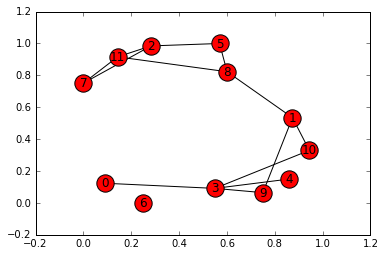

In [61]:
nx.draw_networkx(res, pos = nx.spring_layout(res))
# nx.draw_spring(res)

In [63]:
betwennes = nx.betweenness_centrality(res)
degree = nx.degree_centrality(res)
harmonic = nx.harmonic_centrality(res)
eigen = nx.eigenvector_centrality_numpy(res)
print(nx.betweenness_centrality(res))
print(nx.degree_centrality(res))
print(harmonic)
print(eigen)
max(betwennes, key=betwennes.get), max(degree, key=degree.get), max(harmonic, key=harmonic.get), max(eigen, key=eigen.get)

{0: 0.0, 1: 0.4636363636363636, 2: 0.02727272727272727, 3: 0.3181818181818182, 4: 0.0, 5: 0.06363636363636363, 6: 0.0, 7: 0.0, 8: 0.44545454545454544, 9: 0.16363636363636364, 10: 0.16363636363636364, 11: 0.1909090909090909}
{0: 0.09090909090909091, 1: 0.2727272727272727, 2: 0.2727272727272727, 3: 0.36363636363636365, 4: 0.09090909090909091, 5: 0.18181818181818182, 6: 0.0, 7: 0.18181818181818182, 8: 0.2727272727272727, 9: 0.18181818181818182, 10: 0.18181818181818182, 11: 0.2727272727272727}
{0: 3.816666666666667, 1: 5.833333333333333, 2: 4.866666666666667, 3: 5.733333333333334, 4: 3.816666666666667, 5: 4.816666666666666, 6: 0, 7: 4.366666666666667, 8: 5.833333333333334, 9: 5.166666666666667, 10: 5.166666666666667, 11: 5.316666666666666}
{0: 0.08549214192960904, 1: 0.31569730945033564, 2: 0.4175466479583901, 3: 0.22337255653036792, 4: 0.08549214192960883, 5: 0.31757520774061465, 6: -6.098145412655237e-17, 7: 0.32964348236886604, 8: 0.41220898153666985, 9: 0.2063200520612396, 10: 0.206320

(1, 3, 8, 11)

In [39]:
"""
edges = [
(0, 8),
 (0, 6),
 (0, 7),
 (1, 5),
 (2, 10),
 (2, 11),
 (3, 4),
 (4, 10),
 (4, 7),
 (5, 11),
 (5, 12),
 (5, 9),
 (6, 7),
 (10, 12)]
g = nx.Graph()
g.add_edges_from(edges)
"""

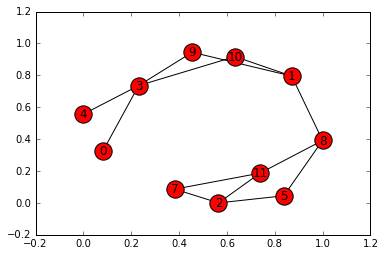

In [66]:
edges = [(0, 3),
 (1, 8),
 (1, 9),
 (1, 10),
 (2, 11),
 (2, 5),
 (2, 7),
 (3, 9),
 (3, 10),
 (3, 4),
 (5, 8),
 (7, 11),
 (8, 11)]
g = nx.Graph()
g.add_edges_from(edges)
nx.draw_networkx(g, pos = nx.spring_layout(g))

In [31]:
print(len(all_graphs))

274668


In [32]:
for g in all_graphs:
    count += 1
    if count % 10000 == 0:
        print(count)
    betwennes = find_maxx(nx.betweenness_centrality(g))
    degree = find_maxx(nx.degree_centrality(g))
    harmonic = find_maxx(nx.harmonic_centrality(g))
    eigen = find_maxx(nx.eigenvector_centrality_numpy(g))
    if len(betwennes) == 1 and len(degree) == 1 and len(harmonic) == 1 and len(eigen) == 1:
        betwennes = betwennes.pop()
        degree = degree.pop()
        harmonic = harmonic.pop()
        eigen = eigen.pop()
        if len({betwennes, degree, harmonic, eigen}) == 4:
            print("Success")
            res = g
            break

20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000


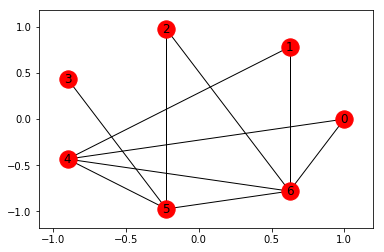

In [20]:
nx.draw_networkx(res, pos = nx.circular_layout(res))

# Graph generation

In [ ]:
count = 0
while True:
    count += 1
    if count % 10000 == 0:
        print(count)
    r = np.random.uniform(0.5, 0.9999)
    g = nx.erdos_renyi_graph(20, r)
    betwennes = find_maxx(nx.betweenness_centrality(g))
    degree = find_maxx(nx.degree_centrality(g))
    harmonic = find_maxx(nx.harmonic_centrality(g))
    eigen = find_maxx(nx.eigenvector_centrality_numpy(g))
    if len(betwennes) == 1 and len(degree) == 1 and len(harmonic) == 1 and len(eigen) == 1:
        betwennes = betwennes.pop()
        degree = degree.pop()
        harmonic = harmonic.pop()
        eigen = eigen.pop()
        if len({betwennes, degree, harmonic, eigen}) == 4:
            print("Success")
            res = g
            break

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
